In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

# Understanding EER

How to estimate EER assuming that class-conditional - mated  and nonmated score distributions - are Gaussian?

Define F-ratio:
$$
 \mbox{F-ratio} = \frac {\mu^C - \mu^I}  {\sigma^C + \sigma^I}
 $$
and the error function:
 $$ \mbox{erf}(z) =  { 2\over \sqrt{\pi}} \int_0^z \mbox{exp} \left [ - t^2 \right ] dt$$
 
The EER has a closed form solution:
 $$  \mbox{EER} = {\frac 1  2} - { \frac 1 2} \mbox{erf} \left ( \frac {\mbox{F-ratio}} {\sqrt{2} }   \right ) \equiv \mbox{eer}(\mbox{F-ratio}) $$
 
 The threshold giving rise to EER is:
 $$
 \Delta = \frac { \mu^I \sigma^C + \mu^C \sigma^I}{ \sigma^I + \sigma^C}
 $$
 
 Source: 
 [Norman Poh, Multi-system Biometric Authentication: Optimal Fusion and User-Specific Information. PhD Thesis, EPFL, 2006.](https://infoscience.epfl.ch/record/146199)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

def _gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


x_values = np.linspace(-15, 15, 100)

def eer(f_ratio):
    return 0.5 - 0.5 * scipy.special.erf(f_ratio / np.sqrt(2))



def two_distributions(m0, sigma0, m1, sigma1):
    mean_ = [m0, m1]
    std_ = [sigma0, sigma1]

    fig = plt.figure(figsize=(15, 8))
    for mu, sig in zip(mean_, std_):
        plt.fill_between(x_values, _gaussian(x_values, mu, sig), alpha=0.3)
        plt.plot(x_values, _gaussian(x_values, mu, sig))

    
    thrd = (m1*sigma0 + m0*sigma1)/ (sigma0+sigma1)
    
    fratio = (m1-m0)/ (sigma0+sigma1)
    plt.plot([thrd, thrd], [0, 1], '--')
    plt.title(f"EER = {eer(fratio): 1.5%},    f-ratio={fratio:1.2f}")
    plt.show()

In [9]:
interact(
    two_distributions,
    m0=widgets.IntSlider(min=-10,max=+10,step=1,value=-3),
    sigma0=widgets.IntSlider(min=1,max=+5,step=1,value=2),
    m1=widgets.IntSlider(min=-10,max=+10,step=1,value=3),
    sigma1=widgets.IntSlider(min=1,max=+5,step=1,value=2)
);

interactive(children=(IntSlider(value=-3, description='m0', max=10, min=-10), IntSlider(value=2, description='…

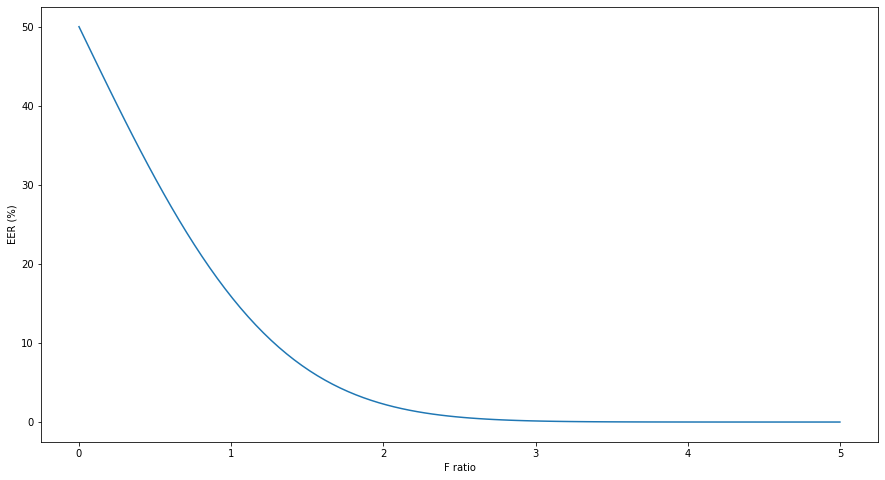

In [4]:
fig = plt.figure(figsize=(15, 8))
fratio = np.linspace(0, 5, 100)
plt.xlabel("F ratio")
plt.ylabel("EER (%)")

plt.plot(fratio, eer(fratio) * 100)

# Simulate fusion with $n$ independent samples

In [6]:
def two_distributions_with_fusion(m0, sigma0, m1, sigma1, n):
    mean_ = [m0, m1, m0, m1]
    
    # The std of the fused score
    sigma0_ = np.sqrt(sigma0 ** 2 / n)
    sigma1_ = np.sqrt(sigma1 ** 2 / n)
    
    std_ = [sigma0, sigma1, sigma0_, sigma1_]

    fig = plt.figure(figsize=(15, 8))
    for mu, sig in zip(mean_, std_):
        plt.fill_between(x_values, _gaussian(x_values, mu, sig), alpha=0.1)
        plt.plot(x_values, _gaussian(x_values, mu, sig))

    
    fratio = (m1-m0)/ (sigma0+sigma1)
    fratio_ = (m1-m0)/ (sigma0_+sigma1_)
    
    gain = eer(fratio)/eer(fratio_)
    
    plt.title(f"EER = {eer(fratio): 1.5%}   EER_com = {eer(fratio_): 1.5%}   Gain = {gain:0.2f}")
    plt.show()
    
interact(
    two_distributions_with_fusion,
    m0=widgets.IntSlider(min=-10,max=+10,step=1,value=-3),
    sigma0=widgets.IntSlider(min=1,max=+5,step=1,value=3),
    m1=widgets.IntSlider(min=-10,max=+10,step=1,value=3),
    sigma1=widgets.IntSlider(min=1,max=+5,step=1,value=3),
    n=widgets.IntSlider(min=1,max=+10,step=1,value=2)
);
    

interactive(children=(IntSlider(value=-3, description='m0', max=10, min=-10), IntSlider(value=3, description='…